# Data Visualization

This project will creating the plot from [The Economist](https://www.economist.com/blogs/dailychart/2011/12/corruption-and-development)


#### 3 import the `ggplot2`, `data.table` , `ggthemes` libraries and use `fread` to load the csv file 'Economist_Data.csv' into a dataframe

In [2]:
library(ggplot2)
library(data.table)
library(ggthemes)
df <- fread('Economist_Data.csv', drop=1) # drop=1 to skip the first column

### Check the head of df 

In [3]:
head(df)

Country,HDI.Rank,HDI,CPI,Region
Afghanistan,172,0.398,1.5,Asia Pacific
Albania,70,0.739,3.1,East EU Cemt Asia
Algeria,96,0.698,2.9,MENA
Angola,148,0.486,2.0,SSA
Argentina,45,0.797,3.0,Americas
Armenia,86,0.716,2.6,East EU Cemt Asia


#### Use `ggplot()` + `geom_point()` to create a scatter plot object called plt.
#### specify aesthetics `x=CPI` , `y=HDI` and `color=Region`

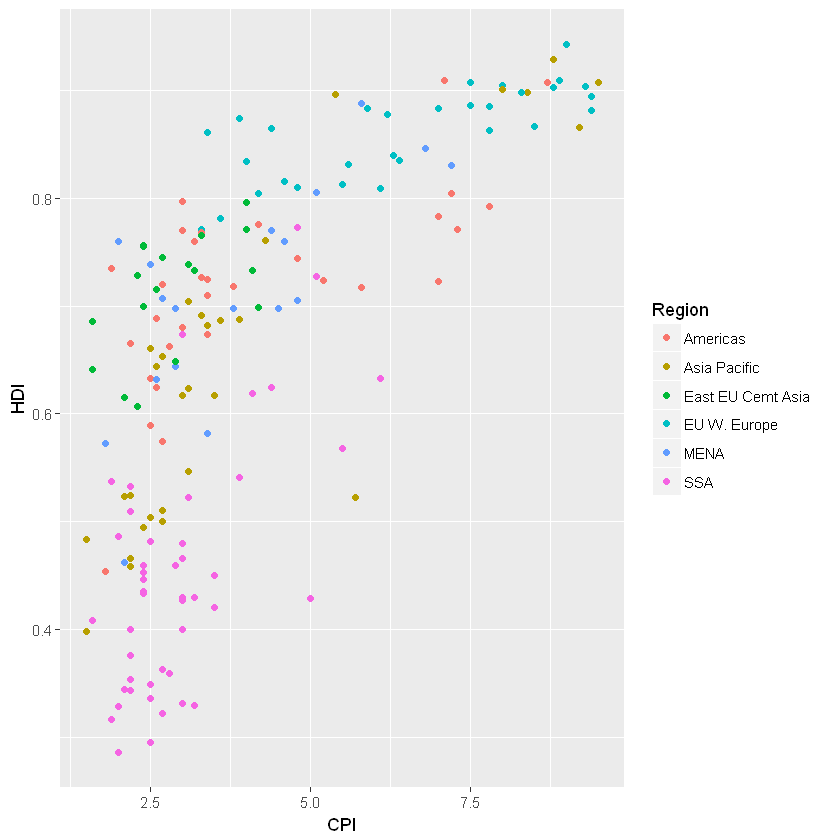

In [4]:
plt <- ggplot(df, aes(x=CPI, y=HDI, color=Region)) + geom_point()
plt

#### change the points to be larger empty circles 

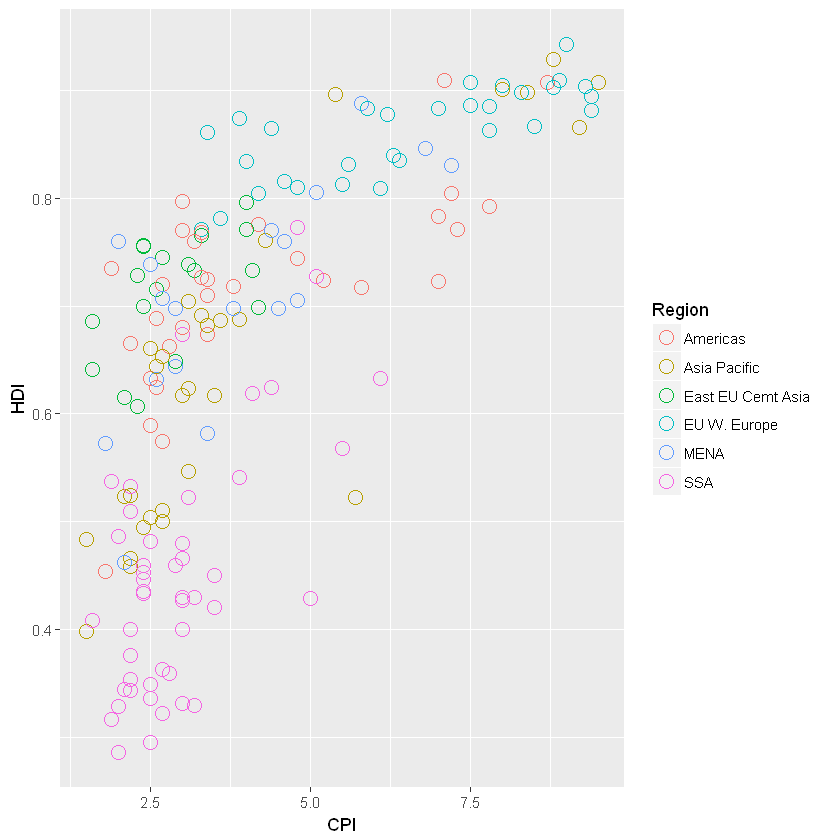

In [5]:
plt <- ggplot(df, aes(x=CPI, y=HDI, color=Region)) + geom_point(size=4, shape=1)
plt

#### add a trend line

`geom_smooth()` using method = 'loess'


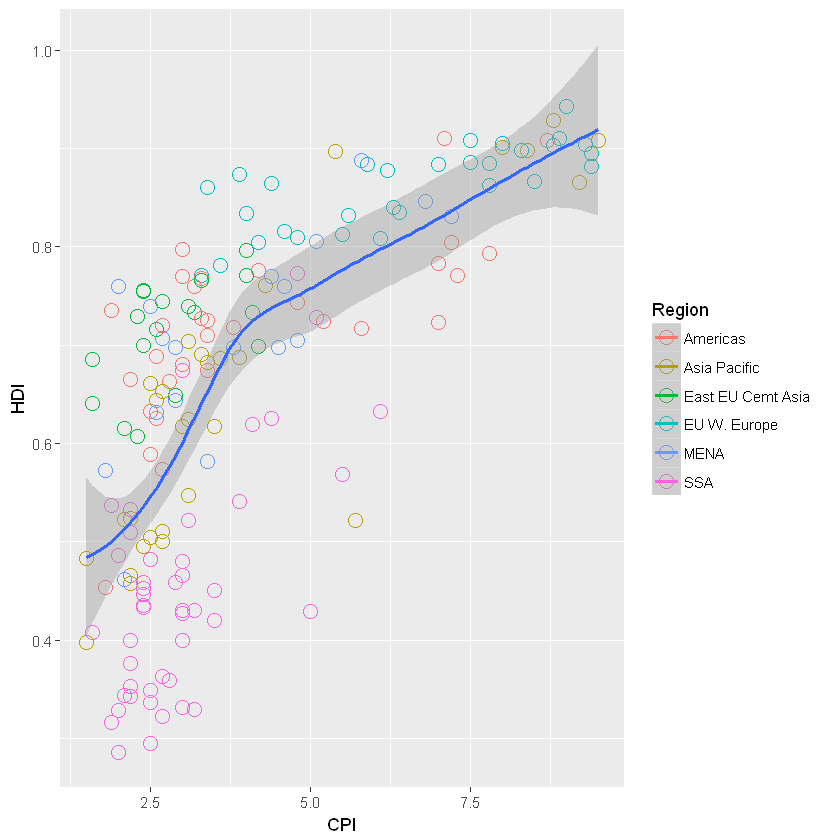

In [6]:
print(plt + geom_smooth(aes(group=1)))


#### further edit to the tread line

- method = 'lm'
- formula = y ~ log(x)
- se = FALSE
- color = 'red'


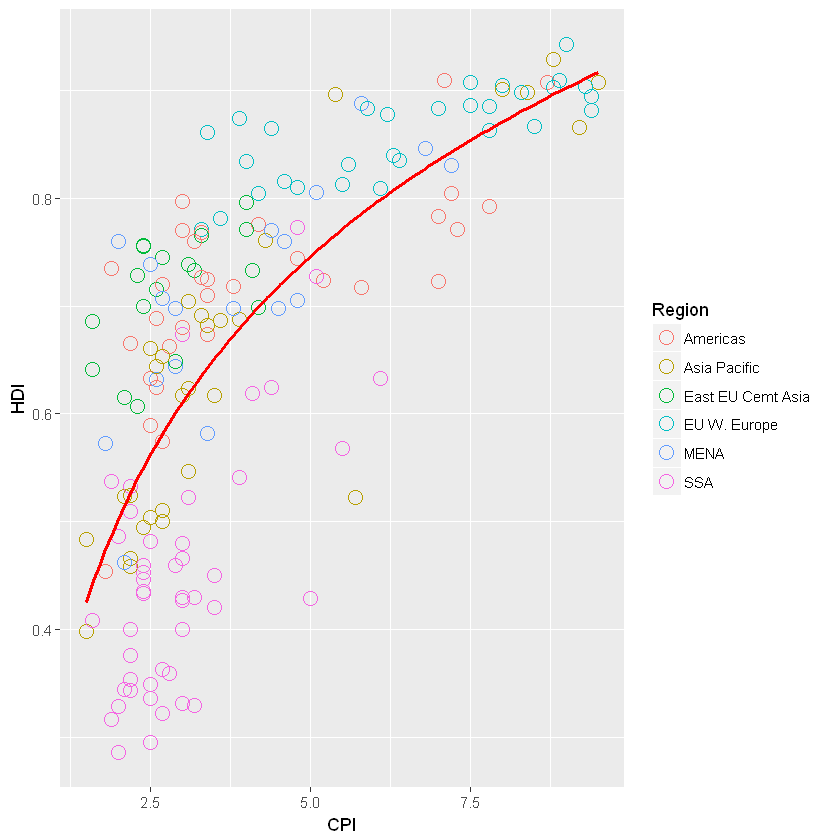

In [7]:
plt <- plt + geom_smooth(aes(group=1), method = 'lm', formula = y ~ log(x), se = FALSE, color = 'red')
plt

#### adding labels use `geom_text()`

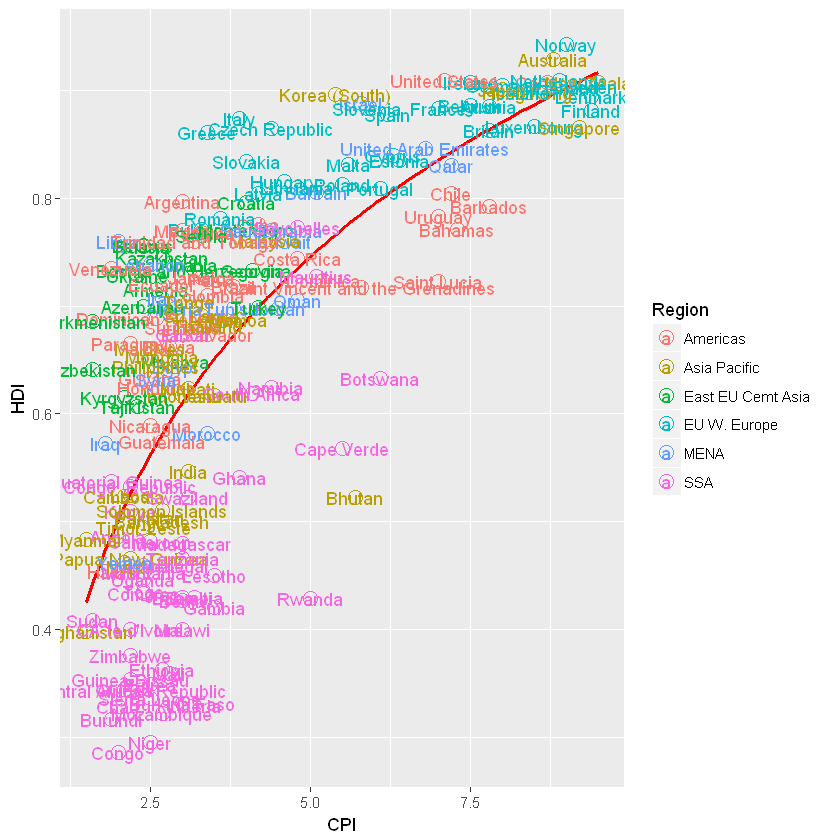

In [8]:
print(plt + geom_text(aes(label=Country)))


#### Labeling a subset to remove the overlap 

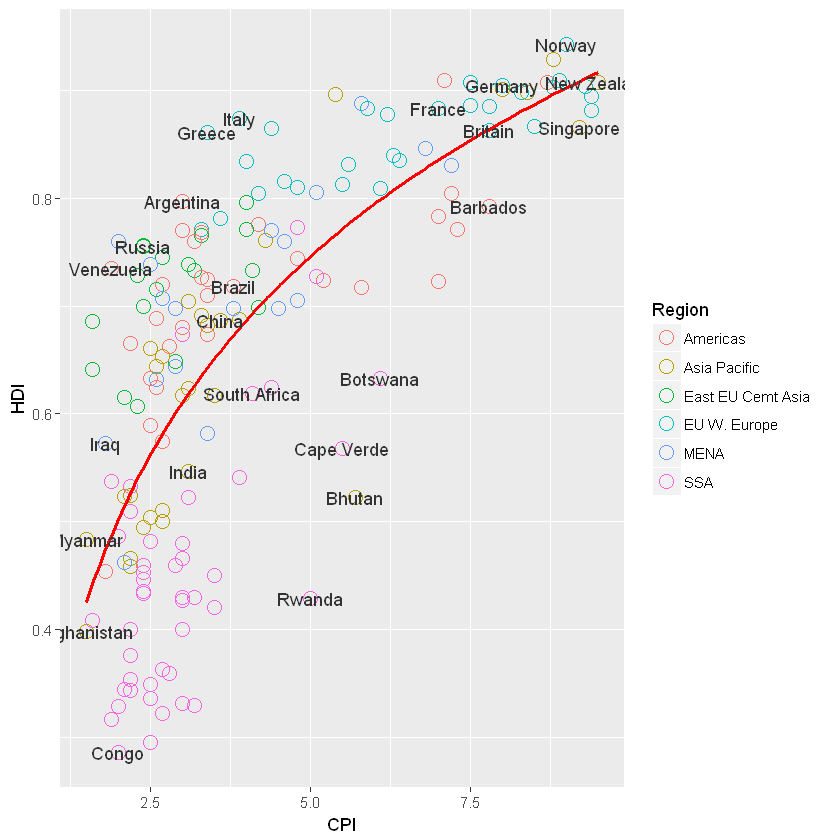

In [9]:
pointsToLabel <- c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                   "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
                   "India", "Italy", "China", "South Africa", "Spane",
                   "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France",
                   "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                   "New Zealand", "Singapore")

plt <- plt + geom_text(aes(label = Country), color="gray20", data = subset(df, Country %in% pointsToLabel),
                      check_overlap = TRUE)
plt

#### add `scale_x_continuous()` 

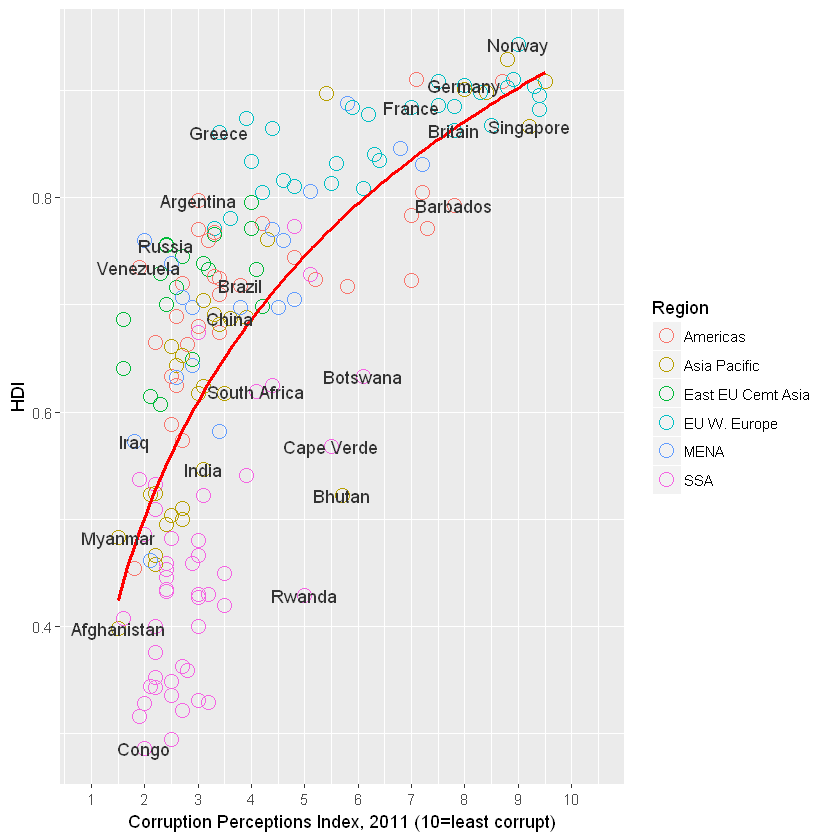

In [10]:
plt <- plt + scale_x_continuous(name="Corruption Perceptions Index, 2011 （10=least corrupt)", limits = c(0.9, 10.5), breaks=1:10)
plt

#### add `scale_y_continuous()` 

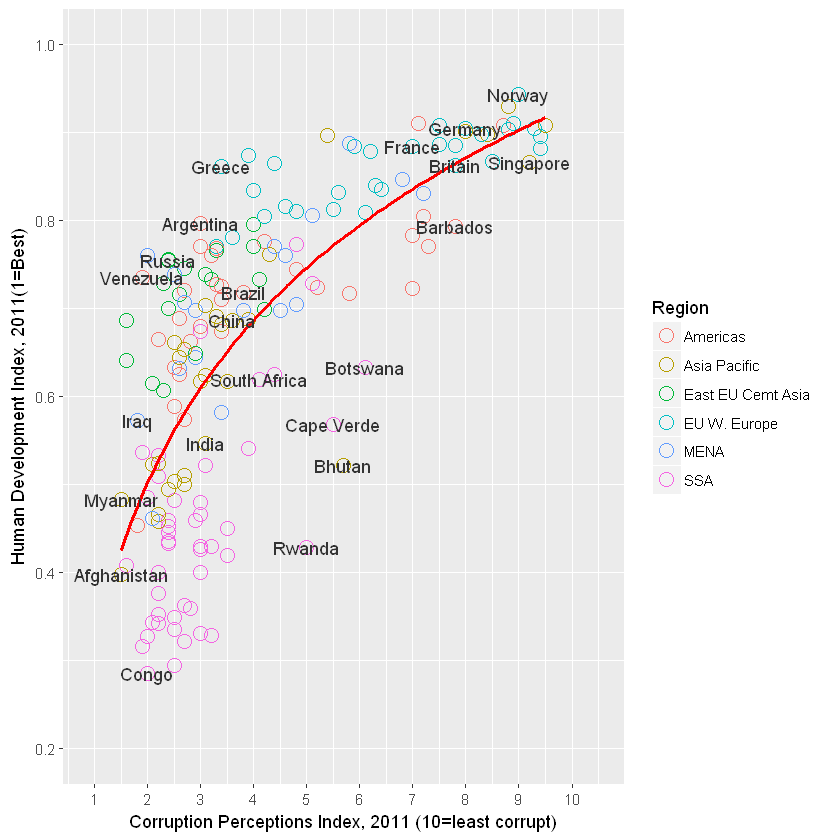

In [11]:
plt <- plt + scale_y_continuous(name="Human Development Index, 2011(1=Best)", limits=c(0.2, 1.0))
plt

#### add title

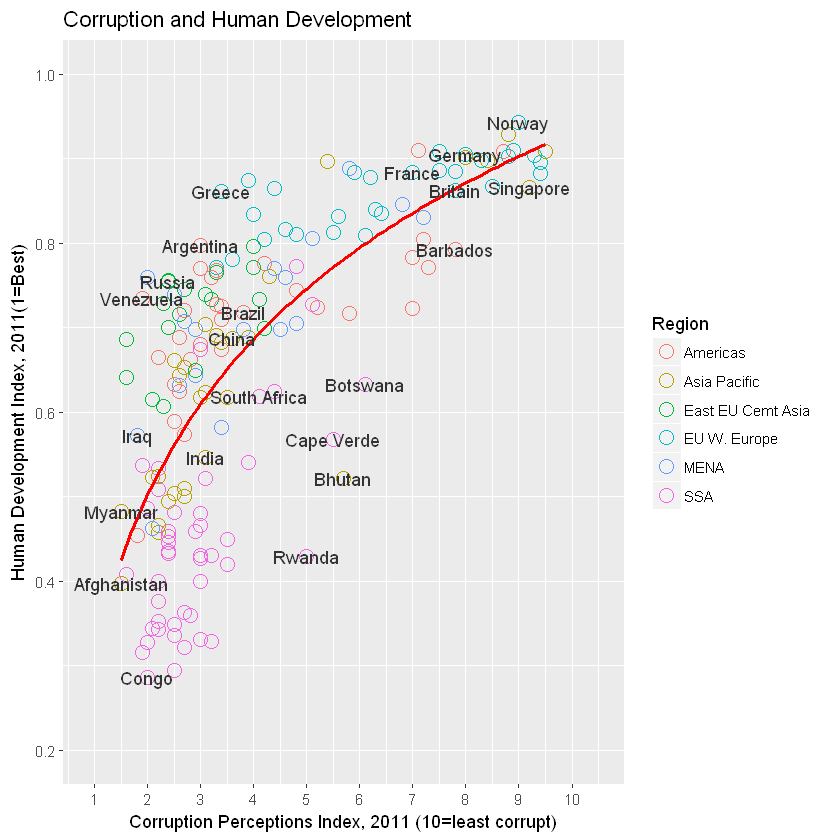

In [12]:
plt <- plt + ggtitle("Corruption and Human Development")
plt

#### add theme

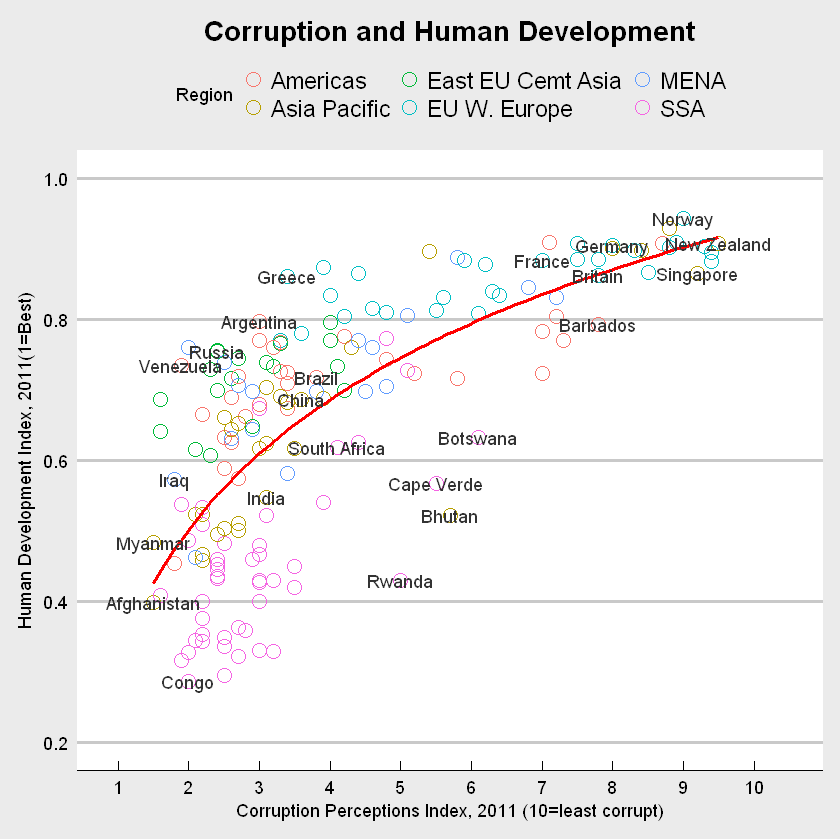

In [13]:
plt <- plt + theme_economist_white() + theme(plot.title = element_text(hjust=0.5))
plt